## Load Libraries and Dataset

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


<h2>Deep Autoencoder</h2>

3 Encoder Layers --- 3 Decoder Layers

In [ ]:
encoding_dim = 32  # Size of our encoded representations 

# encoder
input_img = keras.Input(shape=(x_train.shape[1],))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded) # layer for encoding or code

# decoder
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(x_train.shape[1], activation='sigmoid')(decoded) 

ae1 = keras.Model(input_img, decoded)
ae1.compile(optimizer='adam', loss='binary_crossentropy')
ae1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               1011

In [ ]:
# train the model
ae1.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,  validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 4s 17ms/step - loss: 0.3793 - val_loss: 0.3168
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3078 - val_loss: 0.3048
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.3001 - val_loss: 0.3005
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2958 - val_loss: 0.2965
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2930 - val_loss: 0.2938
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2907 - val_loss: 0.2922
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2889 - val_loss: 0.2920
Epoch 8/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2875 - val_loss: 0.2902
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2862 - val_loss: 0.2879
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2852 - val_lo

First row is orignal images


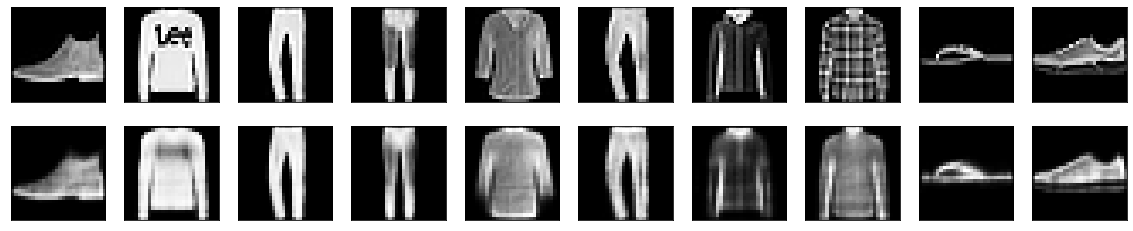

Second row is reconstrcuted images


In [ ]:
decoded_imgs = ae1.predict(x_test)

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')

## Design and Configure Convolutional Autoencoder

3 convolutional Encoder Layer --- 3 convolutional Decoder Layer 

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)        # (60000,28,28,1)
print(x_test.shape)         # (10000,28,28,1)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

ae2 = keras.Model(input_img, decoded) 

ae2.compile(optimizer='adam', loss='binary_crossentropy')
ae2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0   

In [ ]:
# train the model
history = ae2.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 73s 306ms/step - loss: 0.3821 - val_loss: 0.3207
Epoch 2/50
235/235 [==============================] - 72s 305ms/step - loss: 0.3114 - val_loss: 0.3085
Epoch 3/50
235/235 [==============================] - 72s 305ms/step - loss: 0.3040 - val_loss: 0.3036
Epoch 4/50
235/235 [==============================] - 72s 305ms/step - loss: 0.3004 - val_loss: 0.3009
Epoch 5/50
235/235 [==============================] - 72s 305ms/step - loss: 0.2980 - val_loss: 0.2989
Epoch 6/50
235/235 [==============================] - 72s 305ms/step - loss: 0.2961 - val_loss: 0.2974
Epoch 7/50
235/235 [==============================] - 72s 305ms/step - loss: 0.2946 - val_loss: 0.2959
Epoch 8/50
235/235 [==============================] - 71s 304ms/step - loss: 0.2932 - val_loss: 0.2951
Epoch 9/50
235/235 [==============================] - 72s 305ms/step - loss: 0.2921 - val_loss: 0.2938
Epoch 10/50
235/235 [==============================] - 72s 305ms/step - l

First row is orignal images


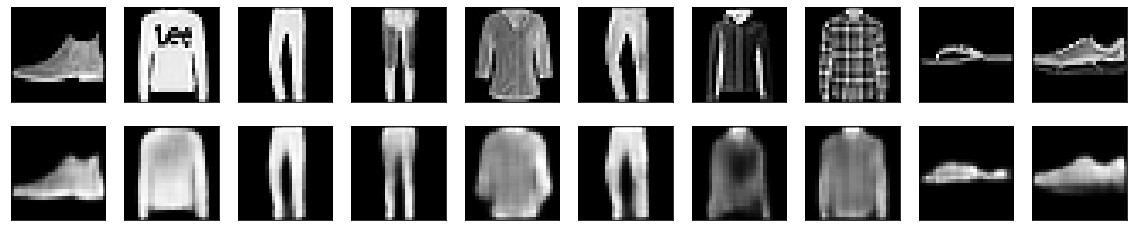

Second row is reconstrcuted images


In [ ]:
decoded_imgs = ae2.predict(x_test)

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')

Encoded representations


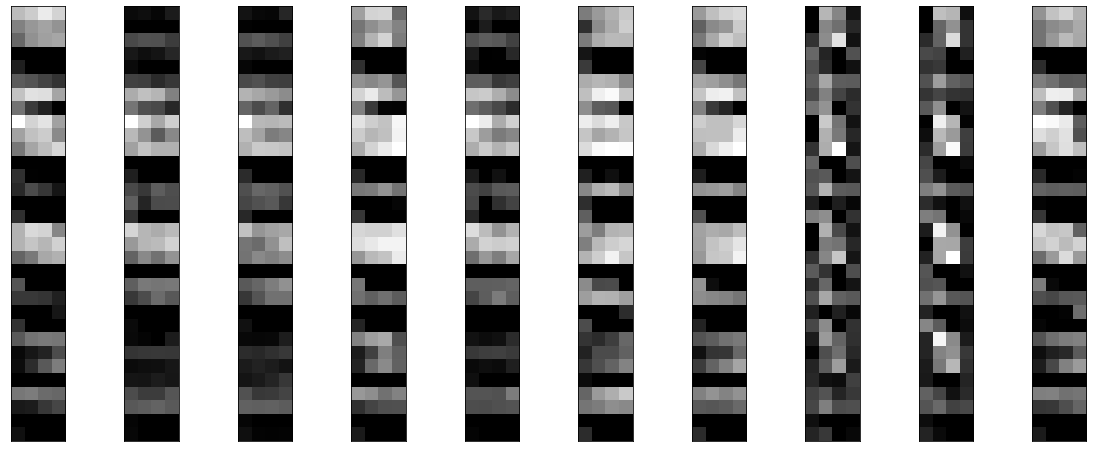

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

print('Encoded representations')
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
